In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [2]:
training_data = pd.read_csv('1S-1X log.csv')
display(training_data)
#Removing negatives
training_data = training_data[(training_data >= 0).all(axis=1)]
display(training_data)

,DEPTH,CALI,GR,ILD,ITT,LLD,LLS,MSFL,NPHI,RHOB,SFL,SP
0,91.4400,-999.2500,17.0387,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.2500
1,91.5924,-999.2500,16.6233,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.2500
2,91.7448,-999.2500,16.0359,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.2500
3,91.8972,-999.2500,15.2310,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.2500
4,92.0496,-999.2500,14.9397,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.2500
...,...,...,...,...,...,...,...,...,...,...,...,...
23330,3646.9320,8.7959,120.8450,-999.25,-999.25,-999.25,-999.25,-999.25,0.2351,2.5498,-999.25,13.7028
23331,3647.0844,8.5674,120.2273,-999.25,-999.25,-999.25,-999.25,-999.25,0.2411,2.5665,-999.25,13.4578
23332,3647.2368,8.4531,116.5244,-999.25,-999.25,-999.25,-999.25,-999.25,0.2475,2.5728,-999.25,9.9158
23333,3647.3892,8.4739,-999.2500,-999.25,-999.25,-999.25,-999.25,-999.25,0.2509,2.5595,-999.25,-999.2500


,DEPTH,CALI,GR,ILD,ITT,LLD,LLS,MSFL,NPHI,RHOB,SFL,SP
9400,1524.0000,14.4538,54.8415,0.9607,0.1233,0.9879,1.0776,1.4853,0.4397,2.2471,1.2134,39.9174
9401,1524.1524,14.0887,55.8918,0.9660,0.1231,0.9906,1.0821,1.5206,0.4255,2.2587,1.1890,39.9393
9402,1524.3048,13.8190,57.2492,0.9624,0.1238,0.9823,1.0876,1.4323,0.4351,2.2589,1.1610,39.3027
9403,1524.4572,13.7363,58.0199,0.9399,0.1252,0.9660,1.0079,1.3148,0.4469,2.2546,1.1243,38.6237
9404,1524.6096,13.8716,58.2939,0.9146,0.1256,0.9360,1.0188,1.2740,0.4353,2.2515,1.0922,38.2129
...,...,...,...,...,...,...,...,...,...,...,...,...
23252,3635.0448,9.3138,115.5579,2.1824,0.0854,2.1704,2.5690,3.1694,0.2417,2.5226,2.6407,11.5939
23253,3635.1972,9.1831,115.3115,2.2141,0.0859,2.1827,2.5769,2.8899,0.2614,2.4981,2.6294,10.5358
23254,3635.3496,8.9994,114.8351,2.2159,0.0865,2.1733,2.5695,1.2580,0.2754,2.5023,2.6371,10.2207
23255,3635.5020,8.9888,115.0071,2.1779,0.0863,2.1579,2.5616,0.7530,0.2617,2.5252,2.6507,10.0463


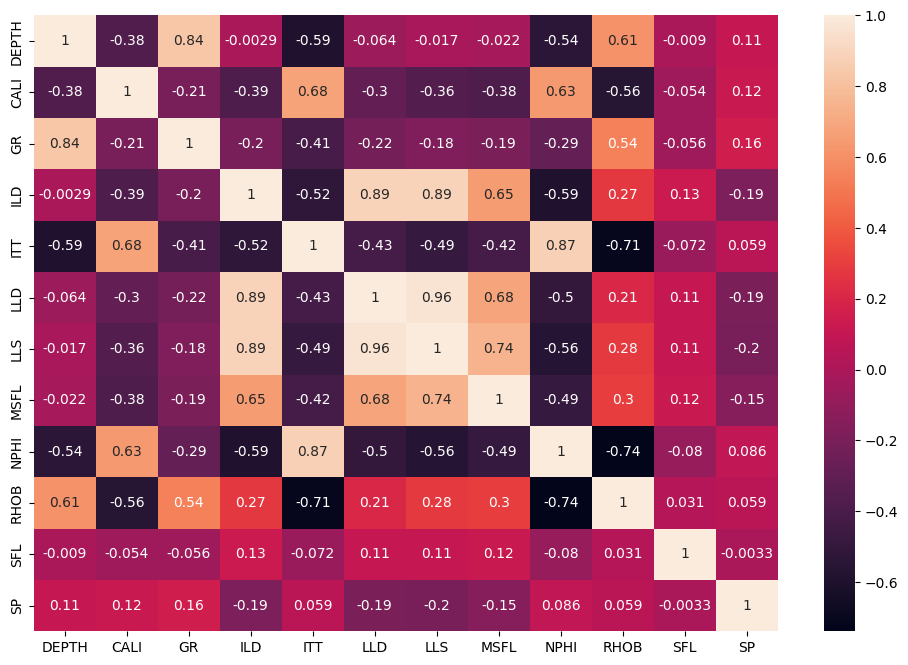

In [3]:
#generating heatmap
plt.figure(figsize=(12,8))
sns.heatmap(training_data.corr(), annot=True)
plt.show()

In [4]:
training_data

,DEPTH,CALI,GR,ILD,ITT,LLD,LLS,MSFL,NPHI,RHOB,SFL,SP
9400,1524.0000,14.4538,54.8415,0.9607,0.1233,0.9879,1.0776,1.4853,0.4397,2.2471,1.2134,39.9174
9401,1524.1524,14.0887,55.8918,0.9660,0.1231,0.9906,1.0821,1.5206,0.4255,2.2587,1.1890,39.9393
9402,1524.3048,13.8190,57.2492,0.9624,0.1238,0.9823,1.0876,1.4323,0.4351,2.2589,1.1610,39.3027
9403,1524.4572,13.7363,58.0199,0.9399,0.1252,0.9660,1.0079,1.3148,0.4469,2.2546,1.1243,38.6237
9404,1524.6096,13.8716,58.2939,0.9146,0.1256,0.9360,1.0188,1.2740,0.4353,2.2515,1.0922,38.2129
...,...,...,...,...,...,...,...,...,...,...,...,...
23252,3635.0448,9.3138,115.5579,2.1824,0.0854,2.1704,2.5690,3.1694,0.2417,2.5226,2.6407,11.5939
23253,3635.1972,9.1831,115.3115,2.2141,0.0859,2.1827,2.5769,2.8899,0.2614,2.4981,2.6294,10.5358
23254,3635.3496,8.9994,114.8351,2.2159,0.0865,2.1733,2.5695,1.2580,0.2754,2.5023,2.6371,10.2207
23255,3635.5020,8.9888,115.0071,2.1779,0.0863,2.1579,2.5616,0.7530,0.2617,2.5252,2.6507,10.0463


In [5]:
#selecting only features with high correlation
high_corr = ['DEPTH', 'CALI', 'GR', 'ITT', 'NPHI', 'RHOB']
#dropping features with high correlation to retain the low ones
x = training_data.drop(high_corr, axis=1)
y = training_data['RHOB']
x

,ILD,LLD,LLS,MSFL,SFL,SP
9400,0.9607,0.9879,1.0776,1.4853,1.2134,39.9174
9401,0.9660,0.9906,1.0821,1.5206,1.1890,39.9393
9402,0.9624,0.9823,1.0876,1.4323,1.1610,39.3027
9403,0.9399,0.9660,1.0079,1.3148,1.1243,38.6237
9404,0.9146,0.9360,1.0188,1.2740,1.0922,38.2129
...,...,...,...,...,...,...
23252,2.1824,2.1704,2.5690,3.1694,2.6407,11.5939
23253,2.2141,2.1827,2.5769,2.8899,2.6294,10.5358
23254,2.2159,2.1733,2.5695,1.2580,2.6371,10.2207
23255,2.1779,2.1579,2.5616,0.7530,2.6507,10.0463


In [6]:
#spliting
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=200)

## ANN

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

In [8]:
from sklearn.metrics import r2_score

In [9]:

# Scale the input features to a specific range (e.g., 0 to 1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:

# Create the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer with one neuron (assuming regression)


In [11]:


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [12]:

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
304/304 [==============================] - 12s 19ms/step - loss: 0.5770
Epoch 2/10
304/304 [==============================] - 4s 14ms/step - loss: 0.0111
Epoch 3/10
304/304 [==============================] - 4s 13ms/step - loss: 0.0095
Epoch 4/10
304/304 [==============================] - 5s 15ms/step - loss: 0.0085
Epoch 5/10
304/304 [==============================] - 5s 15ms/step - loss: 0.0077
Epoch 6/10
304/304 [==============================] - 4s 13ms/step - loss: 0.0070
Epoch 7/10
304/304 [==============================] - 4s 13ms/step - loss: 0.0067
Epoch 8/10
304/304 [==============================] - 5s 16ms/step - loss: 0.0068
Epoch 9/10
304/304 [==============================] - 4s 14ms/step - loss: 0.0064
Epoch 10/10
304/304 [==============================] - 4s 15ms/step - loss: 0.0064


In [13]:


# Evaluate the model on the testing set
loss = model.evaluate(X_test_scaled, y_test)
print('rms:', loss)


130/130 [==============================] - 3s 13ms/step - loss: 0.0068
rms: 0.006808718200773001


In [14]:

# Make predictions on new data
test = pd.read_csv('1S-2X log.csv')
test = test[(test >= 0).all(axis=1)]
test_noTarget = test.drop(high_corr, axis=1)
#new_data = pd.read_csv('new_data.csv')  # Replace 'new_data.csv' with the actual file name
new_data = test_noTarget.copy()
#new_data_scaled = 
predictions = model.predict(scaler.transform(new_data))
test['rhob'] = predictions
r2= r2_score(test['rhob'],test['RHOB'] )
print('r2', r2)


354/354 [==============================] - 8s 19ms/step
r2 -1.2371417385170913


In [15]:
prediction = model.predict(scaler.transform(x))
r2_p = r2_score(training_data['RHOB'], prediction)
print('r2', r2_p)

434/434 [==============================] - 9s 20ms/step
r2 0.5417304332902826


In [16]:
predictions.shape
predictions


array([[2.447449 ],
       [2.447181 ],
       [2.4453697],
       ...,
       [2.8548696],
       [2.8498158],
       [2.85197  ]], dtype=float32)

In [17]:
training_data['RHOB'].shape
training_data['RHOB']

9400     2.2471
9401     2.2587
9402     2.2589
9403     2.2546
9404     2.2515
          ...  
23252    2.5226
23253    2.4981
23254    2.5023
23255    2.5252
23256    2.5331
Name: RHOB, Length: 13857, dtype: float64

## RF

In [18]:
#Generating a model
reg = RandomForestRegressor()

#fit data into the regression model
reg.fit(X_train, y_train)

#Creating a prediction statement
RF_predictions = reg.predict(X_test)

In [19]:
#root mean sq. error
RF_rmse = np.sqrt(mean_squared_error(y_test, RF_predictions))
r2= r2_score(y_test, RF_predictions)

In [20]:
print('Root mean square error',RF_rmse)
print('r2', r2)

Root mean square error 0.05894186204154264
r2 0.7668646151272596


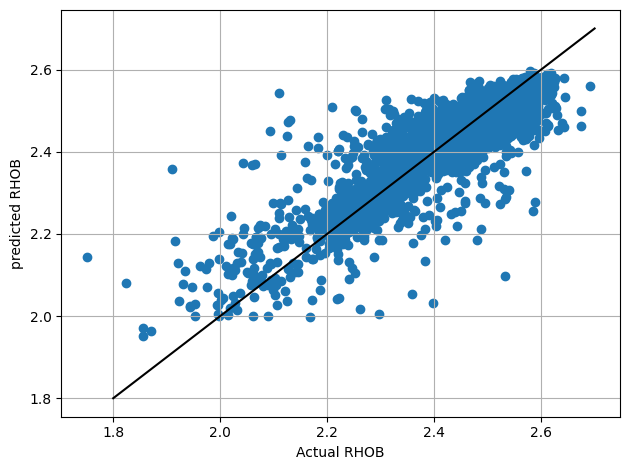

In [21]:
plt.scatter(y_test, RF_predictions)
plt.grid()
plt.plot((1.8, 2.7), (1.8, 2.7), 'black')
plt.ylabel('predicted RHOB')
plt.xlabel('Actual RHOB')

#display the figure
plt.tight_layout()
plt.show()

## Testing trained model in a different well

In [22]:
test_1 = pd.read_csv('1S-2X log.csv')
#Removing negatives
test_1 = test_1[(test_1 >= 0).all(axis=1)]
#selecting only features with low correlation
test_x = test_1.drop(high_corr, axis=1)
test_1['rhob'] = reg.predict(test_x)

In [23]:
test_r2= r2_score(test_1['RHOB'], test_1['rhob'])
print('r2 from test', test_r2)

r2 from test 0.12014296102323507


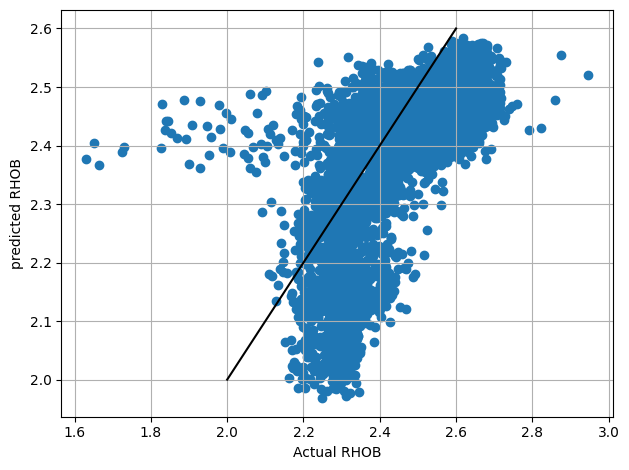

In [24]:
plt.scatter(test_1['RHOB'], test_1['rhob'])
plt.grid()
plt.plot((2, 2.6), (2, 2.6), 'black')
plt.ylabel('predicted RHOB')
plt.xlabel('Actual RHOB')

#display the figure
plt.tight_layout()
plt.show()

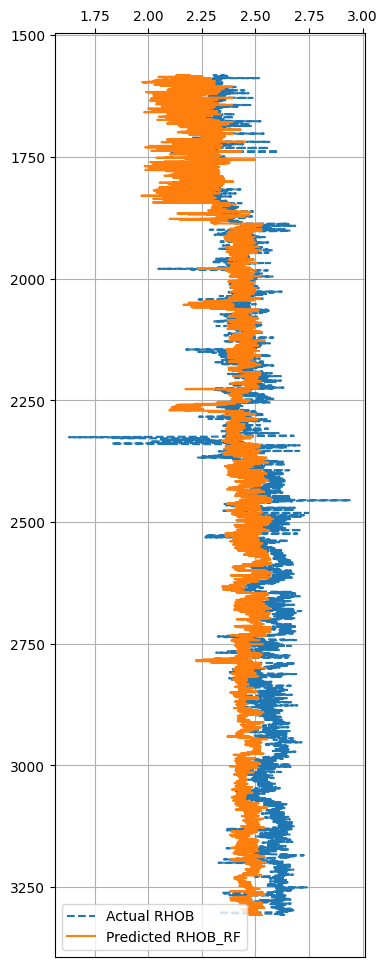

In [25]:
plt.figure(figsize=(4,12))
plt.plot(test_1['RHOB'],test_1['DEPTH'],'--', label = 'Actual RHOB')
plt.plot(test_1['rhob'], test_1['DEPTH'], label = 'Predicted RHOB_RF')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')
plt.grid()
plt.legend()
plt.show()

## END OF CODE